In [1]:
# Add intercept 
import numpy as np
def add_intercept(X):
    """ Returns: New matrix same as X with 1's in the 0th column. """
    new_X = np.zeros((X.shape[0], X.shape[1]+1), dtype=X.dtype)
    new_X[:, 0] = 1
    new_X[:,1:] = X

    return new_X

In [2]:
class LogisticRegression(object):
    def __init__(self, theta=None):
        self.theta = None

    def fit(self, X, y, eps=1e-5):    
        #function g
        self.eps = eps
        g = lambda X: 1 / (1 + np.exp(-X))
        m, n = X.shape
        
        # starting theta = 0
        if self.theta is None:
            self.theta = np.zeros(n)
        
        # update theta
        while True:
            theta = self.theta
            
            # J 
            X_theta = X.dot(theta)
            J = -(1/m)*(y-g(X_theta)).dot(X)
            
            # H 
            H = (1/m)*g(X_theta).dot(g(1-X_theta))*(X.T).dot(X)
            H_inv = np.linalg.inv(H)
            
            # theta update using Newton's Method
            self.theta = theta - H_inv.dot(J)
         
            # if norm is small, then break
            if np.linalg.norm(self.theta-theta, ord=1)<self.eps:
                break

    def predict(self, X):
        g = lambda X: 1 / (1 + np.exp(-X))
        preds = g(X.dot(self.theta))
        return preds

In [3]:
import pandas as pd
import numpy as np

#load data
train_path = "/content/drive/My Drive/Colab Notebooks/CS229/ps1/data/ds1_train.csv"
eval_path = "/content/drive/My Drive/Colab Notebooks/CS229/ps1/data/ds1_valid.csv"

f_train = pd.read_csv(train_path)
y_train = f_train["y"].to_numpy()
X_train = add_intercept(f_train.drop(axis=1, columns="y").to_numpy())

f_eval = pd.read_csv(eval_path)
y_val = f_eval["y"].to_numpy()
X_val = add_intercept(f_eval.drop(axis=1, columns="y").to_numpy())

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

#train a logistic regression classifier
model = LogisticRegression()
model.fit(X_train, y_train)

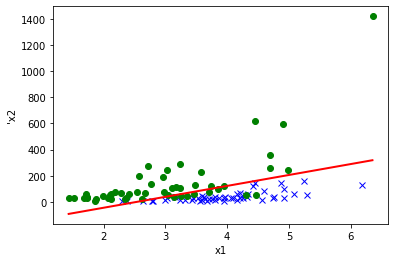

In [5]:
# Plot decision boundary on top of validation set 
y_pred = model.predict(X_val)

d_val = np.column_stack((X_val, y_val))
d_val = pd.DataFrame(d_val, columns=["intercept", "x_0", "x_1", "y"])



plt.plot(d_val[d_val["y"]==1]["x_0"], d_val[d_val["y"]==1]["x_1"], "bx")
plt.plot(d_val[d_val["y"]==0]["x_0"], d_val[d_val["y"]==0]["x_1"], "go")
plt.xlabel("x1")
plt.ylabel("'x2")
#plt.axis([0,6.75,0,1500])

# Plot decision boundary (found by solving for theta^T x = 0)
theta = model.theta
x1 = np.arange(min(X_val[:, -2]), max(X_val[:, -2]), 0.01)
x2 = -(theta[0]/theta[2] * 1+theta[1]/theta[2]*x1)
plt.plot(x1, x2, c='red', linewidth=2)

plt.show()